In [1]:
import gym
import agent as my_agent
import torch
import variable as v
from tqdm import tqdm
import utils
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
env = gym.make('CartPole-v0')

In [3]:
num_action = env.action_space.n
num_state = env.observation_space.shape[0]
seed = 42

## Base Agent

In [34]:
nn_archi = [{'type': 'linear', 'in': num_state, 'out': 10, 'activation': 'relu'}, 
            {'type': 'linear', 'in': 10, 'out': 25, 'activation': 'relu'},
            {'type': 'linear', 'in': 25, 'out': num_action, 'activation': 'None'}]
agent_init_1 = {
    'seed': seed,
    'exploration_rate': {
        'er': 1,
        'max_er': 1,
        'min_er': 0.0,
        'decay_er': 0.05,
        'constant_er': False
    },
    'num_action': num_action,
    'max_position_init': .04,
    'max_position_reward_bonus': 0.0,
    'neural_network_handler': {
        'seed': seed,
        'discount_factor': 1.0,
        'nn_archi': nn_archi,
        "eval_train_delay": 300
    },
    'replay_buffer': {'buffer_size': 1000, 
                      'mini_batch_size': 128, 
                      'seed': seed},
    'optim': {'lr': 0.01}
}
dqn_agent_1 = my_agent.DQN(agent_init_1)

### To compare Agent(s)

In [35]:
train_session = None

In [36]:

agent_init_2 = deepcopy(agent_init_1)
agent_init_2['exploration_rate']["er"] = 0.005
agent_init_2['exploration_rate']["constant_er"] = True
dqn_agent_2 = my_agent.DQN(agent_init_2)

In [37]:
agents = {'dqn eval train delay: 300': dqn_agent_1,
         'dqn eval train delay: 150': dqn_agent_2}

In [38]:
if not train_session:
    print('Train Session reset')
    train_session = utils.TrainSession(agents, env, seed)

Train Session reset


In [39]:
n_episode = 500
t_max_per_episode = 300
graphical = False

In [40]:
train_session.train(n_episode=n_episode, graphical=graphical)

100%|██████████| 500/500 [01:16<00:00,  6.52it/s] 


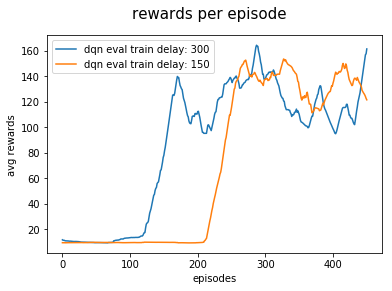

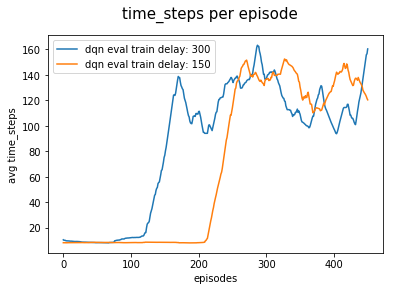

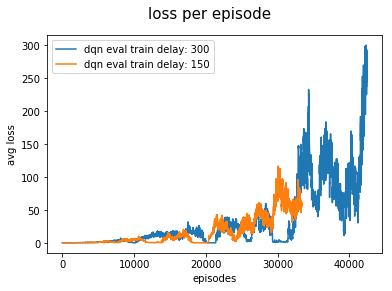

In [41]:
train_session.plot_results(moving_average_n=50)

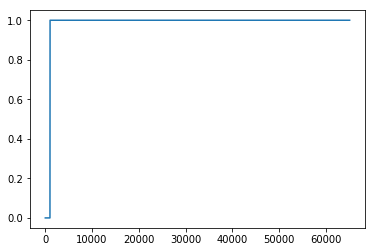

In [54]:
plt.plot(range(len(dqn_agent_2.nn_handler.test)), dqn_agent_2.nn_handler.test)

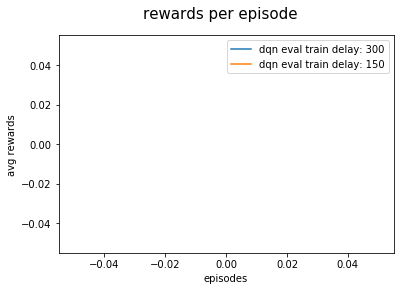

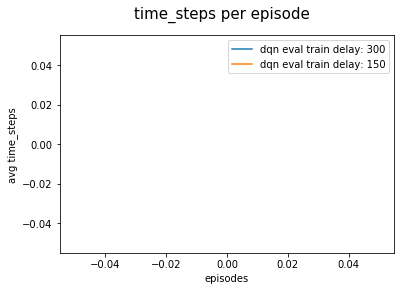

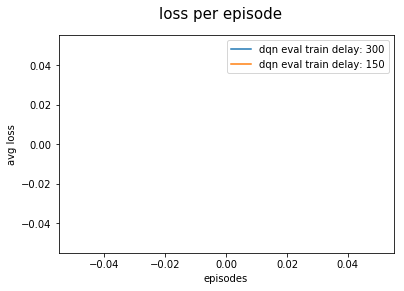

In [30]:
train_session.plot_results(moving_average_n=25)

In [17]:
list(dqn_agent_1.nn_handler.eval_nn.parameters())[:1]
len(dqn_agent_2.nn_handler.replay_buffer) == dqn_agent_2.nn_handler.replay_buffer.buffer_size

True

In [21]:
dqn_agent_2.nn_handler.loss_history[-1]

0.021154312416911125

In [20]:
dqn_agent_2.nn_handler.train(dqn_agent_2.nn_handler.replay_buffer.sample())

In [44]:
'nn_handler' in dqn_agent_1.__dict__.keys()

True

In [25]:
env.close()